In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
)
from sklearn.experimental import enable_halving_search_cv  # noqa: F401
from sklearn.model_selection import HalvingGridSearchCV, HalvingRandomSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [8]:
# 1. Load data
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [9]:
# 2. Common hyperparameter space
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

results = {
    "method": [],
    "time": [],
    "best_cv_score": [],
    "test_accuracy": [],
}

In [10]:
def run_and_store(name, search_obj):
    start = time.time()
    search_obj.fit(X_train, y_train)
    end = time.time()

    best_params = search_obj.best_params_
    best_cv = search_obj.best_score_

    best_model = search_obj.best_estimator_
    y_pred = best_model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred)

    results["method"].append(name)
    results["time"].append(end - start)
    results["best_cv_score"].append(best_cv)
    results["test_accuracy"].append(test_acc)

    print(f"\n=== {name} ===")
    print("Best params:", best_params)
    print("Best CV score:", best_cv)
    print("Test accuracy:", test_acc)
    print("Time (s):", round(end - start, 2))

In [11]:
# 3. Run the four searches

# GridSearchCV
grid = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
)
run_and_store("GridSearchCV", grid)

# RandomizedSearchCV
rand = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_distributions=param_grid,
    n_iter=10,   # subset of combinations
    cv=5,
    n_jobs=-1,
    random_state=0,
)
run_and_store("RandomizedSearchCV", rand)

# HalvingGridSearchCV
halving_grid = HalvingGridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid=param_grid,
    factor=3,
    cv=5,
    n_jobs=-1,
)
run_and_store("HalvingGridSearchCV", halving_grid)

# HalvingRandomSearchCV
halving_rand = HalvingRandomSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_distributions=param_grid,
    factor=3,
    cv=5,
    n_jobs=-1,
    random_state=0,
)
run_and_store("HalvingRandomSearchCV", halving_rand)


=== GridSearchCV ===
Best params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV score: 0.9523809523809523
Test accuracy: 0.9333333333333333
Time (s): 1.95

=== RandomizedSearchCV ===
Best params: {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best CV score: 0.9523809523809523
Test accuracy: 0.9333333333333333
Time (s): 0.03

=== HalvingGridSearchCV ===
Best params: {'criterion': 'gini', 'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.9666666666666668
Test accuracy: 0.9777777777777777
Time (s): 0.37

=== HalvingRandomSearchCV ===
Best params: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_depth': 20, 'criterion': 'entropy'}
Best CV score: 0.9444444444444443
Test accuracy: 0.8888888888888888
Time (s): 0.03


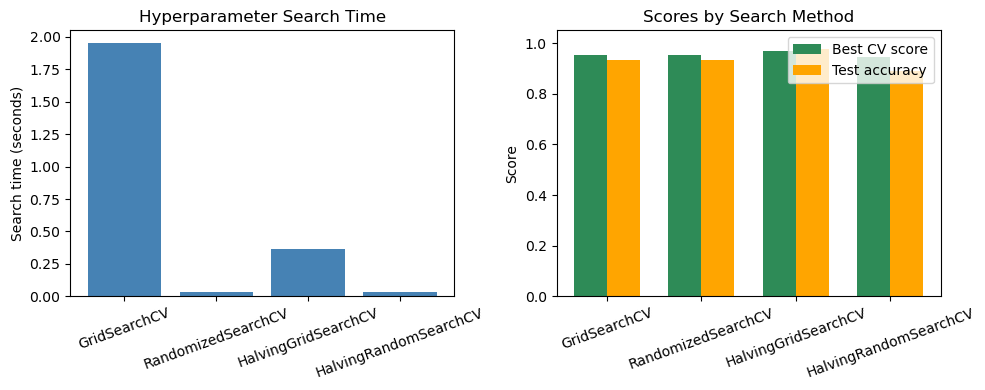

Exception ignored in: <function ResourceTracker.__del__ at 0x724e3bf86020>
Traceback (most recent call last):
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7d5826192020>
Traceback (most recent call last):
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/home/vinny/anaconda3/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ 

In [ ]:
# 4. Plot: time vs method
methods = results["method"]
times = results["time"]
cv_scores = results["best_cv_score"]
test_scores = results["test_accuracy"]

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(methods, times, color="steelblue")
plt.xticks(rotation=20)
plt.ylabel("Search time (seconds)")
plt.title("Hyperparameter Search Time")

# 5. Plot: score vs method (CV and test)
x = np.arange(len(methods))
width = 0.35

plt.subplot(1, 2, 2)
plt.bar(x - width/2, cv_scores, width, label="Best CV score", color="seagreen")
plt.bar(x + width/2, test_scores, width, label="Test accuracy", color="orange")
plt.xticks(x, methods, rotation=20)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Scores by Search Method")
plt.legend()

plt.tight_layout()
plt.show()

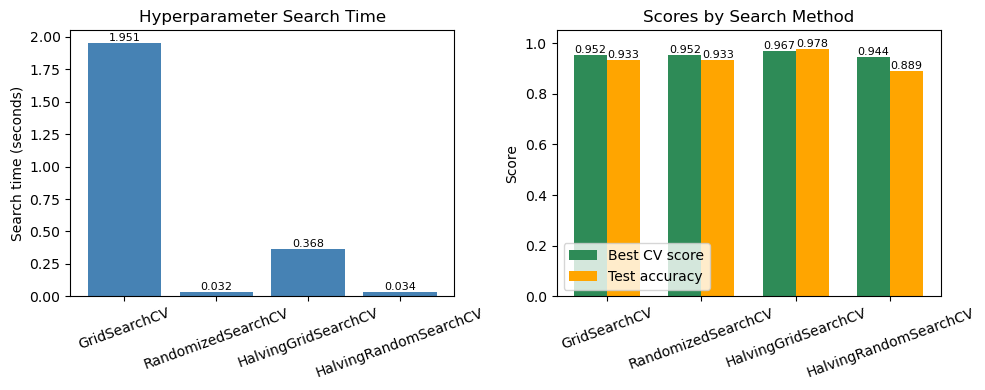

In [13]:
# 4. Plot: time vs method
methods = results["method"]
times = results["time"]
cv_scores = results["best_cv_score"]
test_scores = results["test_accuracy"]

plt.figure(figsize=(10, 4))

# --- Time plot ---
plt.subplot(1, 2, 1)
bars_time = plt.bar(methods, times, color="steelblue")
plt.xticks(rotation=20)
plt.ylabel("Search time (seconds)")
plt.title("Hyperparameter Search Time")

# Add value labels on top of time bars
for bar, val in zip(bars_time, times):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

# --- Score plot (CV and test) ---
x = np.arange(len(methods))
width = 0.35

plt.subplot(1, 2, 2)
bars_cv = plt.bar(x - width/2, cv_scores, width, label="Best CV score", color="seagreen")
bars_test = plt.bar(x + width/2, test_scores, width, label="Test accuracy", color="orange")
plt.xticks(x, methods, rotation=20)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Scores by Search Method")
plt.legend()

# Add value labels on top of CV and test bars
for bar, val in zip(bars_cv, cv_scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

for bar, val in zip(bars_test, test_scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{val:.3f}",
        ha="center",
        va="bottom",
        fontsize=8,
    )

plt.tight_layout()
plt.show()
